In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

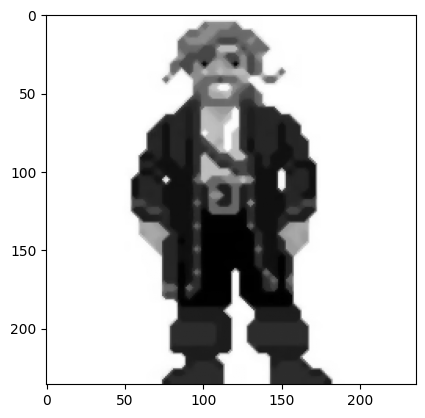

In [2]:
guybrush = cv2.imread('guybrush.jpg', 0)

guybrush = cv2.medianBlur(guybrush, 5)
plt.imshow(guybrush, cmap='gray', vmin=0, vmax=255)

In [3]:
threshold1 = 100
threshold2 = 200

canny_edges = cv2.Canny(guybrush, threshold1, threshold2)

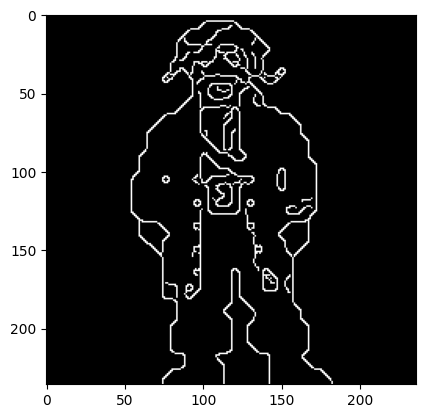

In [4]:
plt.imshow(canny_edges, cmap='gray', vmin=0, vmax=255)

Marr-Hildreth edge detector

In [5]:
def marr_hildreth_edge_detection(image, sigma=0, kernel_size=5, threshold=1):
    # apply Gaussian Blur
    blurred = cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma)

    # compute the Laplacian of the blurred image
    laplacian = cv2.Laplacian(blurred, cv2.CV_64F)

    # detect zero-crossings
    log_edges = np.zeros_like(laplacian)
    rows, cols = laplacian.shape

    for i in range(1, rows):
        for j in range(1, cols):
            patch = laplacian[i-1:i+1, j-1:j+1]
            min_val = patch.min()
            max_val = patch.max()

            # Check if there is a zero crossing
            if min_val < 0 and max_val > 0 and (max_val - min_val) > threshold:
                log_edges[i, j] = 255

    return log_edges

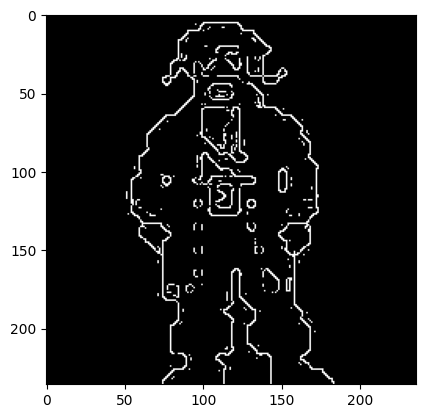

In [6]:
log_edges = marr_hildreth_edge_detection(guybrush, threshold=10)
                             
plt.imshow(log_edges, cmap='gray', vmin=0, vmax=255)

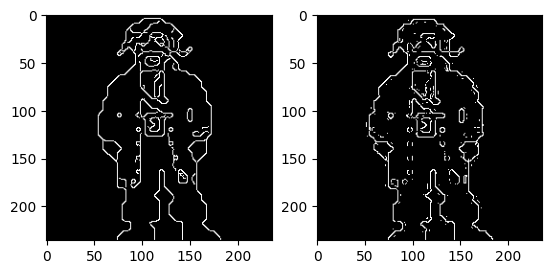

In [7]:
plt.subplot(121)
plt.imshow(canny_edges, cmap='gray', vmin=0, vmax=255)
plt.subplot(122)
plt.imshow(log_edges, cmap='gray', vmin=0, vmax=255)